<a href="https://colab.research.google.com/github/Pepperychef/algoritmos-optimizacion-2020/blob/main/Hern%C3%A1n_Palacios_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Guiada 1 de Algoritmos de Optimizacion
Hernán Palacios Domínguez

https://colab.research.google.com/drive/10Hz9DNKmLtvi04fcfM9Ew55eL9Q386PD?usp=sharing

https://github.com/Pepperychef/algoritmos-optimizacion-2020


## Torres de Hanoi con Divide y Vencerás

In [2]:
def torresHanoi(N, desde, hasta):
  if N==1 :
    print("lleva la ficha" , desde , "hasta" ,hasta)
  else:
    torresHanoi(N-1, desde, 6-desde-hasta)
    print("lleva la ficha" , desde , "hasta" ,hasta)
    torresHanoi(N-1, 6-desde-hasta, hasta)

torresHanoi(6 ,1 ,3)

lleva la ficha 1 hasta 2
lleva la ficha 1 hasta 3
lleva la ficha 2 hasta 3
lleva la ficha 1 hasta 2
lleva la ficha 3 hasta 1
lleva la ficha 3 hasta 2
lleva la ficha 1 hasta 2
lleva la ficha 1 hasta 3
lleva la ficha 2 hasta 3
lleva la ficha 2 hasta 1
lleva la ficha 3 hasta 1
lleva la ficha 2 hasta 3
lleva la ficha 1 hasta 2
lleva la ficha 1 hasta 3
lleva la ficha 2 hasta 3
lleva la ficha 1 hasta 2
lleva la ficha 3 hasta 1
lleva la ficha 3 hasta 2
lleva la ficha 1 hasta 2
lleva la ficha 3 hasta 1
lleva la ficha 2 hasta 3
lleva la ficha 2 hasta 1
lleva la ficha 3 hasta 1
lleva la ficha 3 hasta 2
lleva la ficha 1 hasta 2
lleva la ficha 1 hasta 3
lleva la ficha 2 hasta 3
lleva la ficha 1 hasta 2
lleva la ficha 3 hasta 1
lleva la ficha 3 hasta 2
lleva la ficha 1 hasta 2
lleva la ficha 1 hasta 3
lleva la ficha 2 hasta 3
lleva la ficha 2 hasta 1
lleva la ficha 3 hasta 1
lleva la ficha 2 hasta 3
lleva la ficha 1 hasta 2
lleva la ficha 1 hasta 3
lleva la ficha 2 hasta 3
lleva la ficha 2 hasta 1


## Devolución de Cambio por Técnica Voraz

In [4]:
#Usando el sistema monetario chileno
def cambioMonedas(N, SM):
 valorAcumulado=0
 solution=[0]*len(SM)
 for i,valor in enumerate(SM):
   monedas=int ((N-valorAcumulado)/valor) 
   solution[i]=monedas
   valorAcumulado=valorAcumulado+monedas*valor
   if valorAcumulado ==N:
     return solution

cambioMonedas(5430280 , [20000 ,10000 ,5000 ,2000 ,1000 ,500, 100 , 50, 10])

[271, 1, 0, 0, 0, 0, 2, 1, 3]

## N-Reinas por Técnica de Vuelta Atrás

In [5]:
def esPrometedora(solution,etapa):

  for i in range(etapa+1):
    
    if solution.count(solution[i]) > 1:       
      return False 
  
    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      if abs(i-j) == abs(solution[i]-solution[j]) : 
        return False
  return True

def escribe(S): 
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if solution[i] == x+1:
        print(" X " , end="")     #Cuando es Reina
      else:
        print(" - ", end="")      #Cuando no es Reina


def reinas(n,solution,etapa): #Tamaño del tablero, 4X4
  
  for i in range(1,n+1):
    
    solution[etapa] = i
    
   
    if esPrometedora(solution,etapa):
      if etapa == n-1 :
        print("\n\nLa solución es:")
        print(solution)
        escribe(solution)
        
      else:
        reinas(n,solution,etapa+1)
    else:
      None
    solution[etapa] = 0

In [7]:
n=4
solution = [0 for i in range(n) ]
reinas(n,solution,0)



La solución es:
[2, 4, 1, 3]

 -  -  X  - 
 X  -  -  - 
 -  -  -  X 
 -  X  -  - 

La solución es:
[3, 1, 4, 2]

 -  X  -  - 
 -  -  -  X 
 X  -  -  - 
 -  -  X  - 

## Los puntos más cercanos (Fuerza Bruta)

In [13]:
import numpy as np
def puntoCercano1d(target, points):
    n = points[0] 
    ndif = abs(target - n) 
    for i in range(1, len(points)): 
        nn = abs(target - points[i]) 
        if nn < ndif: 
            ndif = nn 
            n = points[i] 

    return n 

listaNumpy1D = np.random.random(1000)
puntoCercano1d(0.1, listaNumpy1D)

0.09978707855847724

## Los puntos más cercanos (Dvide y Vencerás) 

In [14]:
def puntoCercanoDivide(target, points):
    arr = np.array_split(points, 2)
    if len(arr[1]) == 0:
        return points[0]

    dist1 = abs(target - arr[0][-1])
    dist2 = abs(target - arr[1][0])

    return puntoCercanoDivide(target,
        arr[1] if dist2 < dist1 else arr[0])


listaNumpy1D = np.random.random(1000000)
listaNumpy1D = np.sort(listaNumpy1D)
puntoCercanoDivide(0.3, listaNumpy1D)

0.30000023243183693

## Los puntos más cercanos (Divide y Vencerás)  (2D)


Punto Cercano: [0.50371924 0.46951705]


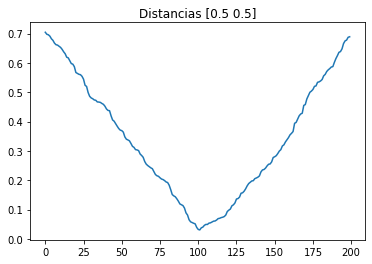

In [17]:
import matplotlib.pyplot as plt

def distancia(point1, point2):
    return np.linalg.norm(point1 - point2)


def puntoCercanoDDivide(target, points):
    arr = np.array_split(points, 2)
    if len(arr[1]) == 0:
        return points[0]

    dist1 = distancia(target, arr[0][-1])
    dist2 = distancia(target, arr[1][0])

    return puntoCercanoDDivide(target,
        arr[1] if dist2 < dist1 else arr[0])


listaNumpy2D = np.random.rand(200, 2)
listaNumpy2D = np.sort(listaNumpy2D, axis=0)
target = np.array([0.5, 0.5])
c = list(map(lambda x: distancia(target, x), listaNumpy2D))

plt.plot(c)
plt.title('Distancias {}'.format(target))
print('\nPunto Cercano: {}'.format(puntoCercanoDDivide(target, listaNumpy2D)))

## Los puntos más cercanos (Divide y Vencerás) (3D)


punto cercano: [0.56993102 0.48444281 0.51888331]


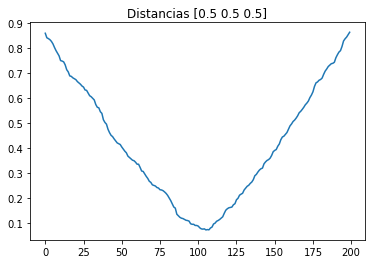

In [20]:
listaNumpy3D = np.random.rand(200, 3)
listaNumpy3D = np.sort(listaNumpy3D, axis=0)
target = np.array([0.5, 0.5, 0.5])
c = list(map(lambda x: distancia(target, x), listaNumpy3D))

plt.plot(c)
plt.title('Distancias {}'.format(target))
print('\npunto cercano: {}'.format(puntoCercanoDDivide(target, listaNumpy3D)))